# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [4]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.6 MB/s eta 0:00:00


In [42]:
# Import essential libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , BatchNormalization, Input,GlobalAveragePooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
import os
import pandas as pd
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, load_model


In [3]:
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
os.environ['PYTHONPATH'] = '-Xfrozen_modules=off'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset.

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

In [6]:
!ls "/content/drive/My Drive"

 AIML		   'Document 2.pdf'		  Screenshot_6.png
'Colab Notebooks'   Resume_Navita_March2025.pdf  'Untitled spreadsheet.gsheet'


In [7]:
%cd "/content/drive/My Drive/AIML/WasteManagement"

/content/drive/My Drive/AIML/WasteManagement


#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [8]:
# unzip the dataset

# step1: check if the unzipped folder already exists
ls = os.listdir('.')
exists = False
for l in ls:
  if(l == 'data'):
    exists = True
    break

#step2: if the folder doesn't exist, unzip the file  data.zip
if exists == False:
  with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall()

#else  don't do anything

In [9]:
# to read files from specific directories and label them
def read_images(path):
  all_images = []
  labels = []
  dir = "data/"+path + "/"
  for image_path in os.listdir(dir):
    img= tf.io.read_file(dir+image_path)
    img = tf.image.decode_png(img)
    all_images.append(img)
    labels.append(str(path))
  return(all_images, labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [10]:
# Get the images and their labels

l = !ls data/
dir_names =list(l.get_list())
labels  = list(str(dir_names[0]).split("  "))
X_data = []
y_data = []
for dir in labels:
  x, y = read_images(dir)
  X_data.extend(x)
  y_data.extend(y)

print(len(X_data), len(y_data))

7625 7625


In [11]:
#check the file loading was successful

X = np.array(X_data)
y = np.array(y_data)
print(X.shape, y.shape)

#OBSERVATION: All 7625 number of images are colorful(channel 3) of size 256*256.

(7625, 256, 256, 3) (7625,)


In [12]:
#check the file loading was successful
print(f'The {len(labels)} Number of categories in input are {labels}')
print(f"The {len(set(y_data))} categories of images loaded belongs to : {set(y_data)}")

#OBSERVATION: All 7  categories of images have been uploaded succcefully listed below

The 7 Number of categories in input are ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
The 7 categories of images loaded belongs to : {'Glass', 'Plastic', 'Cardboard', 'Metal', 'Other', 'Paper', 'Food_Waste'}


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

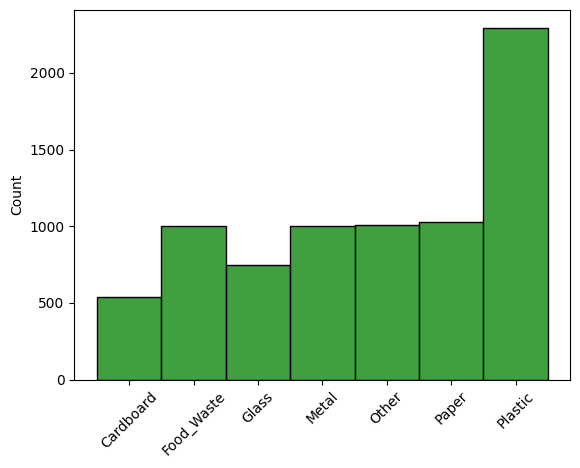

In [13]:
# Visualise Data Distribution
sns.histplot(data = y_data, stat = 'count', binwidth = 2 , discrete = True, element = 'bars', color = 'g')
plt.xticks(rotation = 45)
plt.show()

#OBSERVATION: More than twice the number of images of plastic category in comparision to other categories. The similar number of images in rest of  categories

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

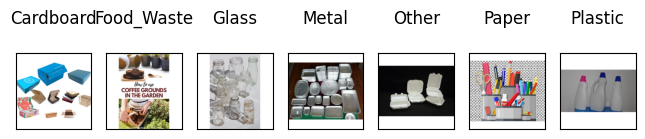

In [14]:
# Visualise Sample Images (across different labels)

# Verify if the images and labels are loaded correctly
#randomly picking one of each type of material
fig = plt.figure(figsize=(8,5))
for i in range(len(labels)):
    ax = fig.add_subplot(1, 7, 1 + i, xticks=[], yticks=[])
    idx = np.where(y[:]==labels[i])[0]
    features_idx = X[idx]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(labels[i]+"\n")
    plt.imshow(np.array(im, dtype=int))
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [15]:
# Find the smallest and largest image dimensions from the data set

img_dimensions = np.empty((len(X_data),4), dtype = int)
img_num =0
#std_dim =  np.array((256, 256, 3))
for index in range(len(X_data)):
    img = X_data[index]
    shape = tf.shape(img).numpy()
    size = tf.size(img).numpy()
    x = np.array([size, shape[0],shape[1],shape[2]])
    img_dimensions[index] =x

smallest_size =  img_dimensions[:,0].min()
smallest_width = img_dimensions[:,1].min()
smallest_length = img_dimensions[:,2].min()
smallest_channels = img_dimensions[:,3].min()

largest_size =  img_dimensions[:, 0].max()
largest_width = img_dimensions[:,1].max()
largest_length = img_dimensions[:,2].max()
largest_channels = img_dimensions[:,3].max()

print("Smallest # of Size: ", smallest_size)
print("Smallest # of Width: ", smallest_width)
print("Smallest # of Length: ", smallest_length)
print("Smallest # of channels: ", smallest_channels)
print("Largest # of Size: ", largest_size)
print("Largest # of Width: ", largest_width)
print("Largest # of Length: ", largest_length)
print("Largest # of channels: ", largest_channels)

## All files are same size(196608) and dimensions(256*256*3) which is fair. No need to reshape

Smallest # of Size:  196608
Smallest # of Width:  256
Smallest # of Length:  256
Smallest # of channels:  3
Largest # of Size:  196608
Largest # of Width:  256
Largest # of Length:  256
Largest # of channels:  3


In [16]:
# Resize the image dimensions

# The pixel size of 256*256 is big for purpose of waste material identification. resize the images to 32*32
width= 64
height = 64
X_data_resized = []
for img in X_data:
  img = tf.image.resize_with_pad(img, width, height)
  X_data_resized.append(img)

X = (np.array(X_data_resized))
print(X.shape)

(7625, 64, 64, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [17]:
# Encode the labels suitably
y = pd.get_dummies(y)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [18]:
# Assign specified parts of the dataset to train and validation sets
import sklearn.model_selection as sk

X_train, X_test, y_train, y_test = sk.train_test_split(X, y,test_size=0.3, random_state = 42, shuffle= True)

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


x_train shape: (5337, 64, 64, 3)
5337 train samples
2288 test samples


In [19]:

# convert to float, normalise the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 256
X_test /= 256
# function to build a model



## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [20]:
# look at the shape of images
X_train.shape[1:]

# this means that we have 32*32*3 number of inputs for eacgh image

(64, 64, 3)

#### Custom Models(5 different models)

In [21]:
tf.keras.utils.set_random_seed(1)

In [22]:
## 5 CNN model configurations that we'll be creating and comparing for classification of this data set.

model_structure = [  {'name': 'config1','layers':1,'activation': 'relu','kernels': [64],'filter': [(3,3)],'pooling': [False] ,'BN': [False] ,'Dense_layers': [False],'drop_out': [False], 'optimiser': 'adam','metrics': ['accuracy'],'learning_rate': .002,'batch_size': 32,'epochs':10} ,

    {'name': 'config2', 'layers':2, 'activation': 'relu', 'kernels': [128,64],'filter':[(3,3),(3,3)], 'BN': [True,True], 'pooling': [(2,2),(2,2)],'Dense_layers': [128], 'drop_out':[.25, False], 'optimiser': 'adam','metrics':['accuracy'], 'learning_rate': .002, 'batch_size': 32, 'epochs':10} ,

	{'name': 'config3', 'layers':3, 'activation': 'relu','kernels': [128,64,64],'filter':[(2,2),(2,2),(2,2)],'BN': [True,False,True],'pooling': [(2,2),(2,2),(2,2)],'Dense_layers': [128],'drop_out': [.10,.10, .2],'optimiser': 'sgd','metrics': ['accuracy'],'learning_rate': .01,'batch_size': 64,'epochs':10 },

	{'name': 'config4','layers':3,'activation': 'relu','kernels': [64,64,128],'filter':[(3,3),(3,3),(3,3)],'BN': [True,True,True],'pooling': [(2,2),(2,2),(2,2)],'Dense_layers': [64],'drop_out': [.10,.20,.10],'optimiser': 'adam','metrics': ['accuracy'],'learning_rate': .002,'batch_size': 32,'epochs':10},

	{'name': 'config5','layers':3, 'activation': 'relu','kernels': [64,128,128],'filter':[(3,3),(3,3),(3,3)],'BN': [True,False,True],'pooling': [(2,2),(2,2),(2,2)],'Dense_layers': [128],'drop_out': [.10,.10,.10],'optimiser': 'adam','metrics': ['accuracy'],'learning_rate': .001,'batch_size': 32,'epochs':	10}
]

In [23]:
# function to create a Sequential model for a given config

def create_model(config):
  model = Sequential()
  model.add(Input(shape = X_train.shape[1:]))
  model.add(Activation(config['activation']))
  ## add convolution layers
  for i in range(config['layers']):
      model.add(Conv2D(config['kernels'][i], config['filter'][i]))
      model.add(Activation(config['activation']))
      if (config['BN'][i]):
        model.add(BatchNormalization())
      if(config['pooling'][i]):
        model.add(MaxPooling2D(pool_size = config['pooling'][i]))
      if(config['drop_out'][i]):
        model.add(Dropout(config['drop_out'][i]))


  model.add(GlobalAveragePooling2D())

    # add dense layers
  for i in range(len(config['Dense_layers'])):
    if (config['Dense_layers'][i]):
      model.add(Dense(config['Dense_layers'][i]))
      model.add(Activation(config['activation']))
      #print("Added dENSE lAYER")

  model.add(Flatten())
  model.add(Dense(len(labels)))
  model.add(Activation('softmax'))
  #print("Added SOFTMAX lAYER")
  return model

#### Transfer Learning Model(ResNet)

In [43]:
# TRANSFER LEARNING MODEL

def get_trans_model():
    # Get base model
    # Here we are using ResNet50 as base model
    base_model = ResNet50(weights='imagenet', include_top=False)

    # As we are using ResNet model only for feature extraction and not adjusting the weights
    # we freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False

    # Get base model output
    base_model_ouput = base_model.output

    # Adding our own layer
    x = GlobalAveragePooling2D()(base_model_ouput)
    # Adding fully connected layer
    x = Dense(512, activation='relu')(x)
    x = Dense(len(labels), activation='softmax', name='fcnew')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

In [93]:
# Get the model
model = get_trans_model()
# Compile it
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Summary of model
model.summary()

Model: "functional_85"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_11[0… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 24,640,391 (94.00 MB)

 Trainable params: 1,052,679 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [24]:
# compile & training each model

def execute_model(model_structure):
    config_result = []
    for config in model_structure:
      print(config)
      model = create_model(config)

      model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer= tf.keras.optimizers.Adam (learning_rate=config['learning_rate']),
              metrics=config['metrics'])
      #print(model.summary())

      history = model.fit(X_train, y_train,
              batch_size=config['batch_size'],
              epochs=config['epochs'],
              validation_data=(X_test, y_test), shuffle=True)
      config_result.append( {'name': config['name'], 'history': history })
    return config_result

In [25]:
#main program to train 5 custom models

config_result = execute_model(model_structure)


{'name': 'config1', 'layers': 1, 'activation': 'relu', 'kernels': [64], 'filter': [(3, 3)], 'pooling': [False], 'BN': [False], 'Dense_layers': [False], 'drop_out': [False], 'optimiser': 'adam', 'metrics': ['accuracy'], 'learning_rate': 0.002, 'batch_size': 32, 'epochs': 10}
Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.3054 - loss: 4.5362 - val_accuracy: 0.4244 - val_loss: 1.5707
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.5645 - loss: 1.2550 - val_accuracy: 0.4803 - val_loss: 1.5244
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.7473 - loss: 0.7956 - val_accuracy: 0.4668 - val_loss: 1.7127
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.8345 - loss: 0.5514 - val_accuracy: 0.4965 - val_loss: 1.7937
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - accuracy: 0.8960 - loss: 0.3733 - val_accuracy: 0.4996 - val_loss: 2.0980
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9309 - 

In [94]:
# Training the fully conncected layer for initial epochs of the ResNet model

# Training the model
epochs = 10
batch_size = 32
hist_trans = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size = batch_size,
    shuffle = True,
    verbose=1)

config_result.append({'name': 'ResNet', 'history': hist_trans })

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 84s 474ms/step - accuracy: 0.3166 - loss: 1.8250 - val_accuracy: 0.3348 - val_loss: 1.7252
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 95s 555ms/step - accuracy: 0.3598 - loss: 1.6854 - val_accuracy: 0.3645 - val_loss: 1.6782
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 146s 577ms/step - accuracy: 0.3792 - loss: 1.6465 - val_accuracy: 0.3746 - val_loss: 1.6557
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 119s 438ms/step - accuracy: 0.3956 - loss: 1.6185 - val_accuracy: 0.3789 - val_loss: 1.6450
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 77s 408ms/step - accuracy: 0.4036 - loss: 1.5981 - val_accuracy: 0.3864 - val_loss: 1.6369
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 81s 406ms/step - accuracy: 0.4096 - loss: 1.5801 - val_accuracy: 0.3842 - val_loss: 1.6257
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 103s 532ms/step - accuracy: 0.4211 - loss: 1.5648 - val_accuracy: 0.3837 - val_loss: 1.6199
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 122s 413ms/step - accuracy: 0.4218 - los

#### Visualise key metrics for each config

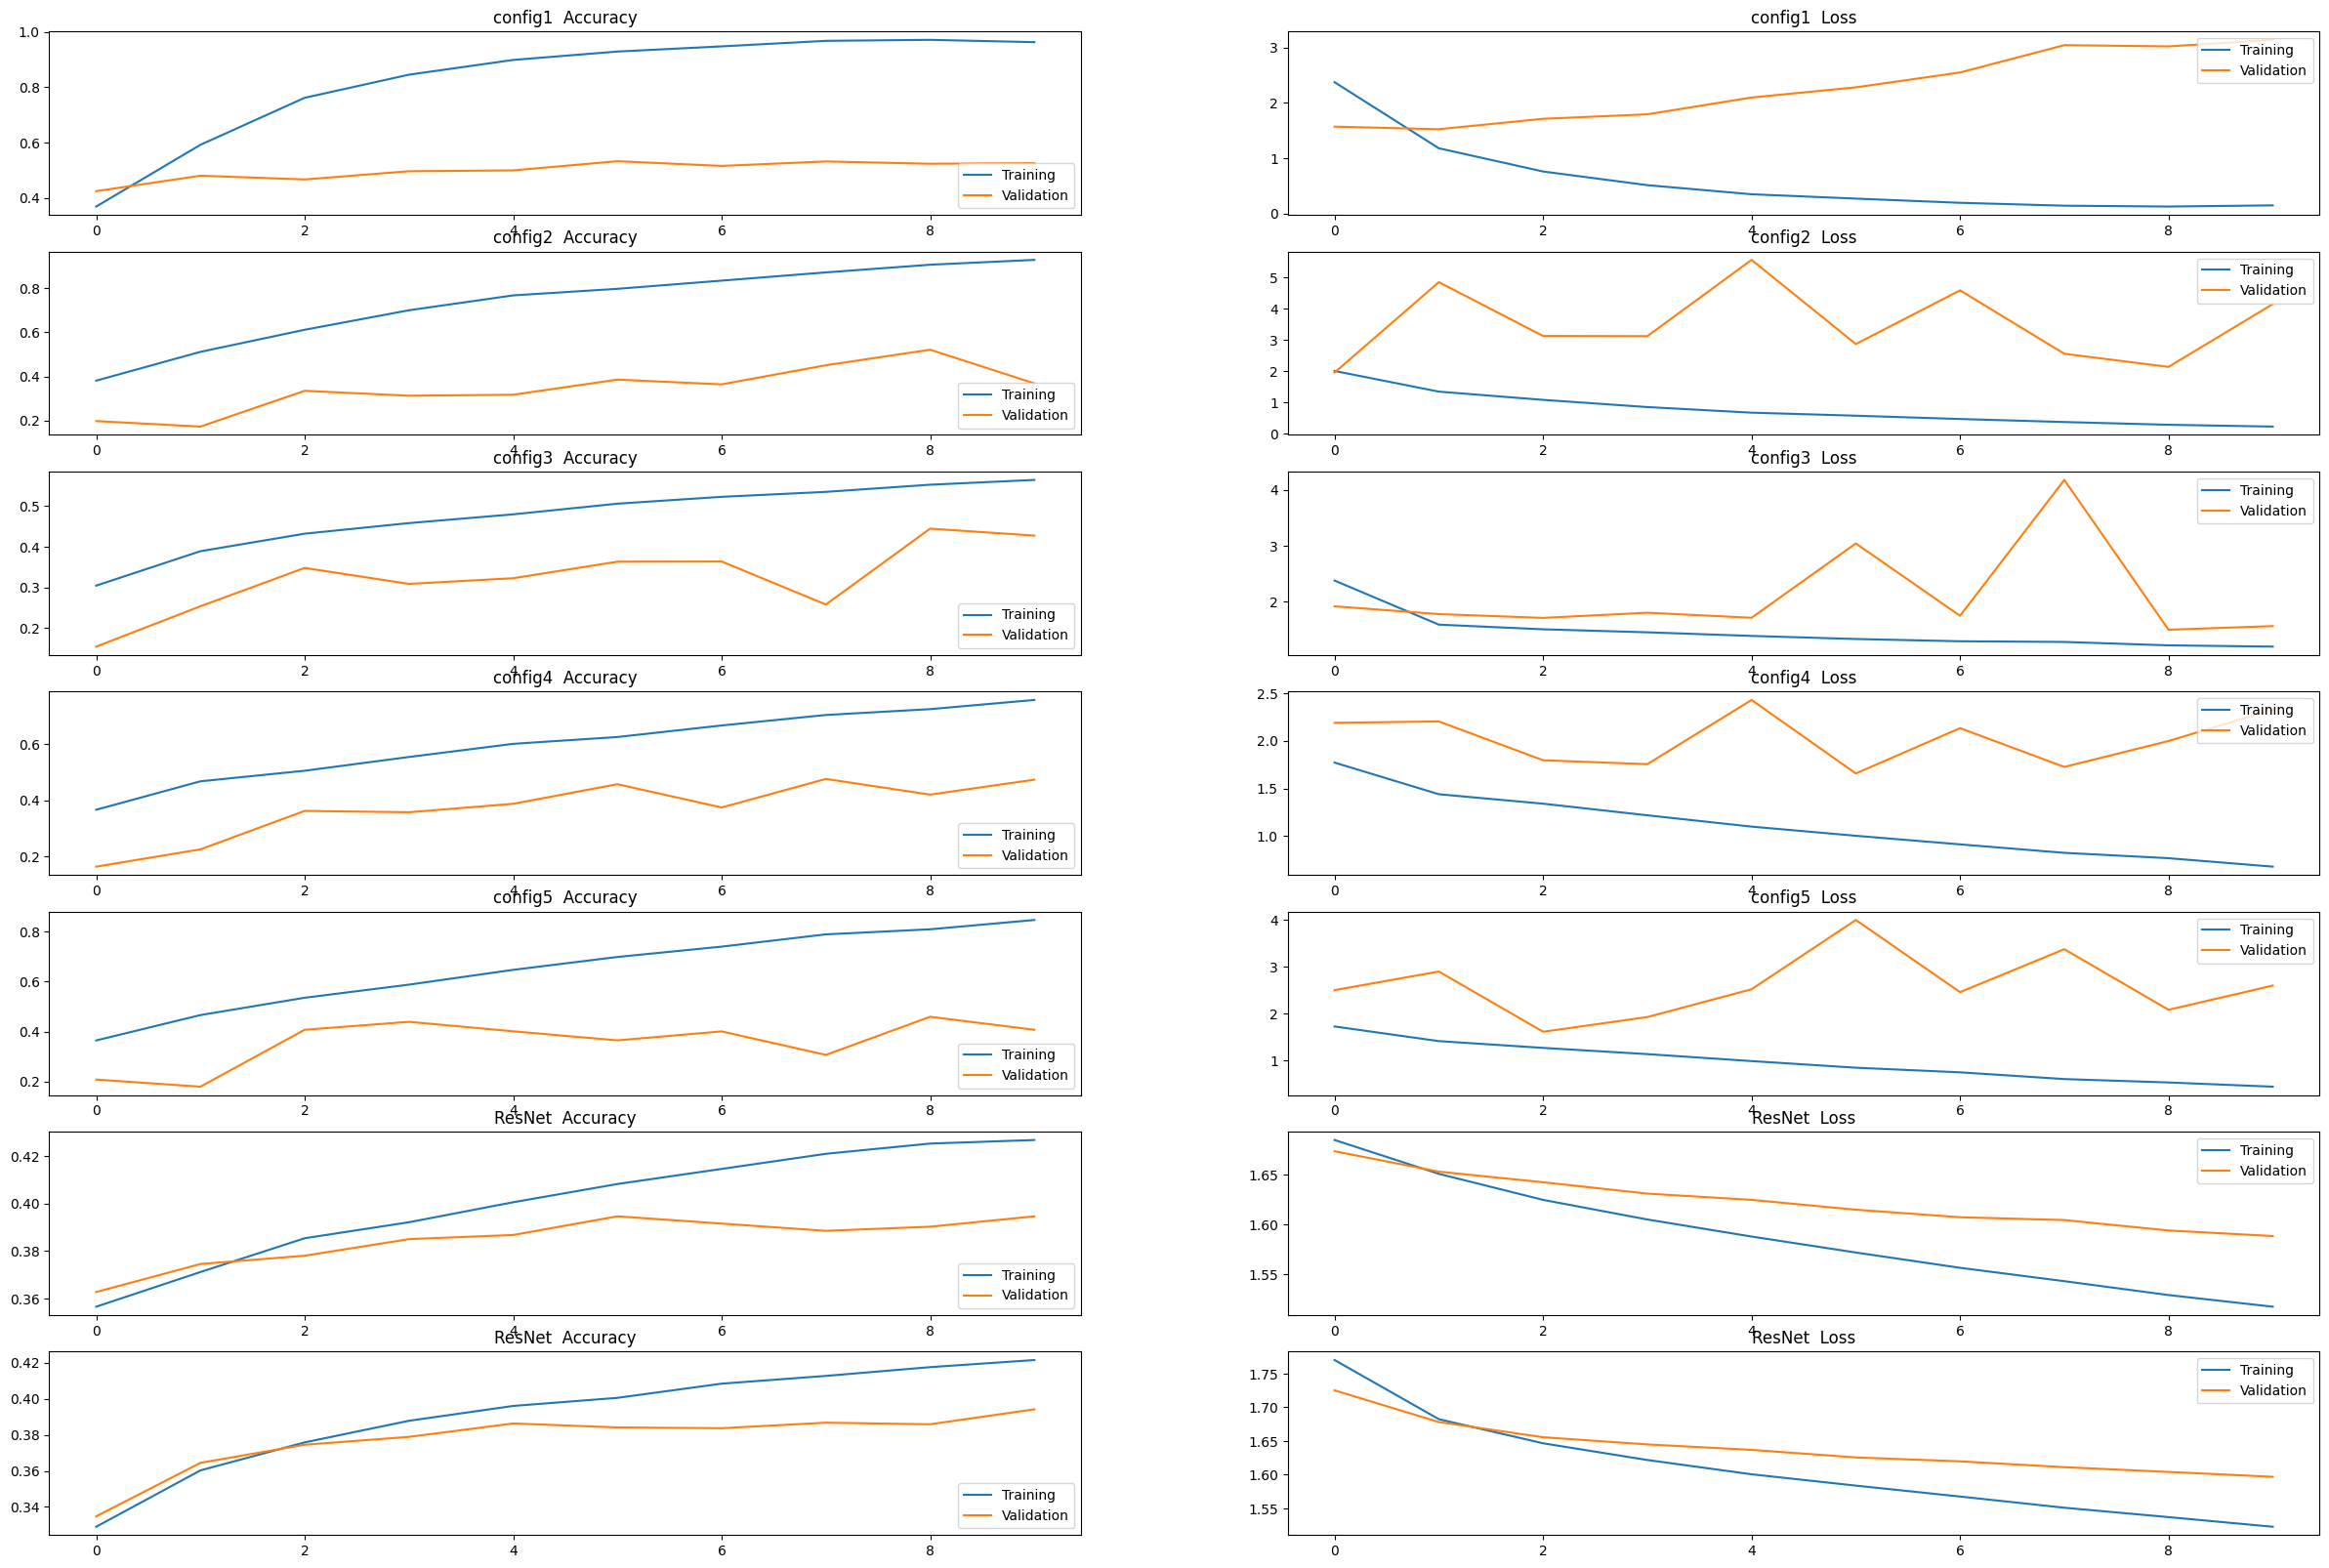

In [95]:
result_count = len(config_result)
i=1
epochs_range = range(0,10) #constant across all models

#fig = plt.figure(figsize=(30,20))
axs , fig = plt.subplots(result_count,2, figsize=(30,20))

for result in config_result:

  history = result['history'].history
  name = result['name']
  acc = history['accuracy']
  val_acc = history['val_accuracy']

  loss = history['loss']
  val_loss = history['val_loss']

  plt.subplot(result_count,2,i)
  plt.plot(epochs_range, acc, label='Training')
  plt.plot(epochs_range, val_acc, label='Validation')
  plt.legend(loc='lower right')
  plt.title(name + '  Accuracy')

  plt.subplot(result_count,2,i+1)
  plt.plot(epochs_range, loss, label = 'Training')
  plt.plot(epochs_range, val_loss, label = "Validation")
  plt.legend(loc = 'upper right')
  plt.title(name +  "  Loss")
  i= i+2

plt.show()

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [27]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [53]:
# Evaluate on the test set
#Based on the above stats we select ResNet model as the best of all 6 models. Let us evaluate the test data using the model

final_model = config_result[-1]['history'].model
y_test_pred = final_model.predict (X_test)

y_test_pred2 = np.argmax(y_test_pred, axis = 1)
y_test2 = np.argmax(y_test, axis = 1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 316ms/step


In [54]:
class_report = pd.DataFrame(classification_report(y_test2,y_test_pred2, output_dict = True))
class_report = class_report.rename(columns = {'0':labels[0], '1':labels[1], '2':labels[2], '3':labels[3], '4':labels[4],'5': labels[5], '6':labels[6]})
l =  "CLASSIFICATION MATRIX".center(80)
print(l)
class_report

                             CLASSIFICATION MATRIX                              


Cardboard  Food_Waste       Glass       Metal       Other  \
precision    0.367188    0.401734    0.421965    0.335484    0.369048   
recall       0.261111    0.451299    0.318777    0.359862    0.109929   
f1-score     0.305195    0.425076    0.363184    0.347245    0.169399   
support    180.000000  308.000000  229.000000  289.000000  282.000000   

                Paper     Plastic  accuracy    macro avg  weighted avg  
precision    0.300640    0.473008  0.394668     0.381295      0.395688  
recall       0.440625    0.541176  0.394668     0.354683      0.394668  
f1-score     0.357414    0.504801  0.394668     0.353188      0.382338  
support    320.000000  680.000000  0.394668  2288.000000   2288.000000

In [56]:
#Confusion matrix per label

cm = multilabel_confusion_matrix(y_test2,y_test_pred2)
for index in range(len(labels)):
  print(f"The confusion matrix for {labels[index]}:\n {cm[index]} \n" )


The confusion matrix for Cardboard:
 [[2027   81]
 [ 133   47]] 

The confusion matrix for Food_Waste:
 [[1773  207]
 [ 169  139]] 

The confusion matrix for Glass:
 [[1959  100]
 [ 156   73]] 

The confusion matrix for Metal:
 [[1793  206]
 [ 185  104]] 

The confusion matrix for Other:
 [[1953   53]
 [ 251   31]] 

The confusion matrix for Paper:
 [[1640  328]
 [ 179  141]] 

The confusion matrix for Plastic:
 [[1198  410]
 [ 312  368]] 



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

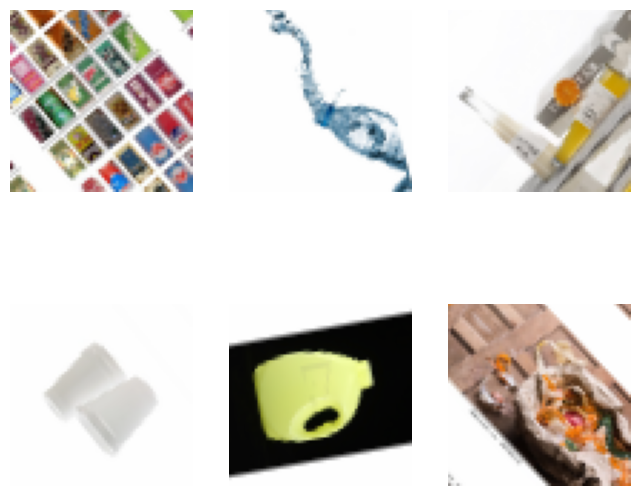

In [58]:
# Create a function to augment the images

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
])

plt.figure(figsize=(8, 7))
for i in range(6):
  image = X_train[i]
  augmented_image = data_augmentation(image)
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(augmented_image.numpy())
  plt.axis("off")

In [91]:
# Create the augmented training dataset
# Defining the imagedatagenerator for train and test images
# We don't give horizonal_flip or other preprocessing for validation data generator

image_size = 64
batch_size = 32

train_data_gen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2,width_shift_range=0.2, horizontal_flip=True)
valid_data_gen = ImageDataGenerator()
train_aug = train_data_gen.flow(X_train, y_train, batch_size=batch_size)
test_aug = valid_data_gen.flow(X_test, y_test, batch_size=batch_size)


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

##### **4.1.2**

Train the model on the new augmented dataset.

In [92]:
# Train the model using augmented images

model.fit(
    train_aug,
    validation_data=test_aug,
    epochs=epochs,
    batch_size = batch_size,
    verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


167/167 ━━━━━━━━━━━━━━━━━━━━ 72s 433ms/step - accuracy: 0.3385 - loss: 1.7000 - val_accuracy: 0.3807 - val_loss: 1.6368
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 72s 432ms/step - accuracy: 0.3526 - loss: 1.6739 - val_accuracy: 0.3776 - val_loss: 1.6039
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 427ms/step - accuracy: 0.3592 - loss: 1.6703 - val_accuracy: 0.3540 - val_loss: 1.6453
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 70s 422ms/step - accuracy: 0.3503 - loss: 1.6609 - val_accuracy: 0.3855 - val_loss: 1.6114
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 74s 445ms/step - accuracy: 0.3587 - loss: 1.6565 - val_accuracy: 0.3772 - val_loss: 1.6058
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 102s 611ms/step - accuracy: 0.3698 - loss: 1.6412 - val_accuracy: 0.3842 - val_loss: 1.6234
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 115s 446ms/step - accuracy: 0.3558 - loss: 1.6621 - val_accuracy: 0.3562 - val_loss: 1.6524
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 79s 472ms/step - accuracy: 0.3537 - loss: 1.6625 - v

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

INSIGHTS:

* All images(7625) provided are colorful of dimensions 256x256x3 which were resized to 64x64 (lower resolution) for the purpose of this assignment.
* The seven categories of images are: Cardboard, Food_Waste, Glass, Metal, Other,Paper, Plastic.
* The total number of images of 'plastic' category is almost double than that of others.
* Decreasing batch_size results in better accuracy
* Increasing learning rate(config3 , config 4) results in more fluctuations and lesser validation accuracy in same number of epochs.


CONCLUSIONS:

* For all 5 custom models,  train_accuracy improves with epochs however the test_accuracy fluctuates drastically after a certain point which indicates over-fitting. This is most likely due to a relatively simpler model or smaller training data set. We need  more traing data and augmented data to help improve model accuracy.
* The transfer learning model(ResNet) shows the consistent improvement in test accuracy inline with train accuracy as epochs increase. I expect this to perform better if it is to be trained with more number of epochs
* Unexpectedly, the model accuracy has dropped using augmented data. This needs to be investigated further in terms of kind of augmentations done etc(Out of scope of this assignment)
